In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from australian_housing import paths

In [3]:
ts = pd.read_csv(paths.manager.processed_data_file, index_col=0)
ts.head()

,Value
Time,
2011-07-01,1511.0
2011-08-01,1634.0
2011-09-01,1561.0
2011-10-01,1485.0
2011-11-01,1594.0


In [4]:
ts.describe()

,Value
count,73.000000
mean,2009.342466
std,489.139472
min,982.000000
25%,1594.000000
50%,2007.000000
75%,2461.000000
max,3006.000000


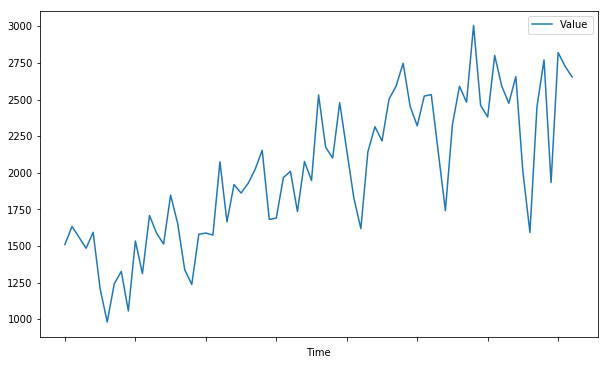

In [5]:
ts.plot(figsize=(10,6));

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
res = seasonal_decompose(ts, model='additive', freq=12)

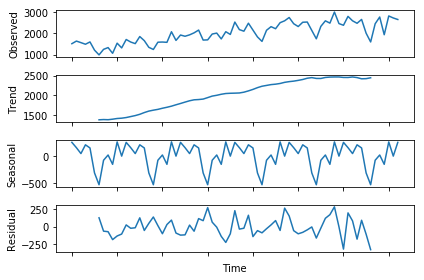

In [8]:
res.plot();

In [9]:
from statsmodels.tsa.tsatools import detrend

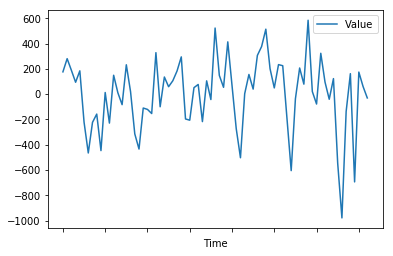

In [10]:
detrend(ts).plot();

In [11]:
from pandas.plotting import lag_plot, autocorrelation_plot

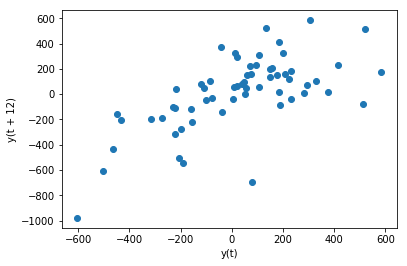

In [12]:
lag_plot(detrend(ts), lag=12);

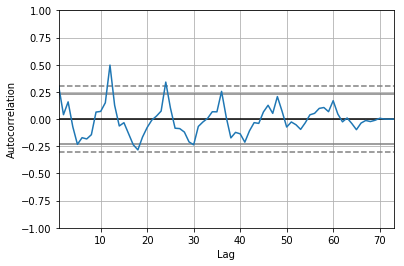

In [13]:
autocorrelation_plot(detrend(ts));

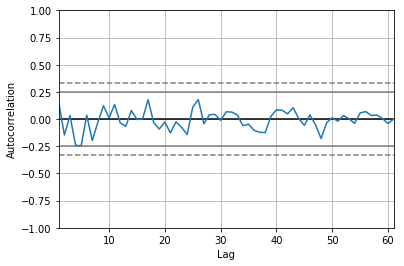

In [14]:
autocorrelation_plot(res.resid[~res.resid['Value'].isna()]);